In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import gzip
import pickle

In [2]:
with gzip.open('.\\MyData.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [12]:
print(len(loaded_data))
def trim_channels(lst, max_channels=23):
    trimmed_lst = []
    for data, label in lst:
        # If data contains more than max_channels channels, trim it
        if len(data) > max_channels:
            data = data[:max_channels]
        if len(data) == max_channels:
            trimmed_lst.append((data, label))
    return trimmed_lst

loaded_data = trim_channels(loaded_data)
print(len(loaded_data))

3615
3615


In [ ]:
processed_data = []
N = len(loaded_data[0][0][0])


# plt.xlim(left = 20)
# plt.xlim(right = 60)
# plt.ylim(top = 1*10**-5)
# plt.ylim(bottom = 0)

N = len(loaded_data[0][0][0])
time_axis = np.arange(0, len(loaded_data[0][0][0])) /256
T = 1.0 / 256
x = np.linspace(0.0, N*T, N, endpoint=False)
for window in loaded_data:
    data, labels = window
    maxim = True
    for channel in data:
        y = channel
        yf1 = fft(y)
        xf1 = fftfreq(N, T)[:N//2] 
        Y = (2.0/N * np.abs(yf1[0:N//2]))  
        maxim &= max(Y[((np.where(xf1 == 50))[0][0]):((np.where(xf1 == 61))[0][0])]) < (1*10**-5) 
    if maxim == True:
        processed_data.append((data,labels))
    else:
        print(labels)
        plt.plot(time_axis, data[0])
        plt.show()
        plt.plot(xf1, 2.0/N * np.abs(yf1[0:N//2]))
        plt.grid()
        plt.show()

In [ ]:
print((processed_data)[300])
print(len(loaded_data))
print(len(processed_data))

In [ ]:
N = len(loaded_data[0][0][0])
# sample spacing
T = 1.0 / 256
x = np.linspace(0.0, N*T, N, endpoint=False)
y1 = loaded_data[300][0][0]
yf1 = fft(y1)
xf1 = fftfreq(N, T)[:N//2]


plt.plot( xf1, 2.0/N * np.abs(yf1[0:N//2]))
# plt.xlim(left = 20)
# plt.xlim(right = 120)
# plt.ylim(top = 3*10**-5)
# plt.ylim(bottom = 0)
plt.grid()
plt.show()
Y = (2.0/N * np.abs(yf1[0:N//2]))
avg = max(Y[((np.where(xf1 == 50))[0][0]):((np.where(xf1 == 61))[0][0])])
a = [5,10,65,12]
print(avg)
print((2.0/N * np.abs(yf1[0:N//2]))[1700])
print(((np.where(xf1 == 60))[0][0]))
print(xf1[1800])

In [ ]:
labels = []
channel = 10
time_axis = np.arange(0, len(processed_data)) 
arr = []
dt = 0
for i in range(len(processed_data)):
    # dt = np.var((processed_data[i][0][channel])) # variance
    # dt = np.std((processed_data[i][0][channel])) # std deviation
    # dt = np.average(abs((processed_data[i][0][channel]))) # mean/average (abs(loaded_data[i][0][channel]).sum())
    # dt = np.median((abs((processed_data[i][0][channel])))) # median
    dt = (abs(processed_data[i][0][channel]).sum())
    arr.append(dt)
    # labels.append((loaded_data[i][1])*np.max(dt)*0.25)
    labels.append((processed_data[i][1])*np.max(dt)*0.25)
plt.plot(time_axis, arr)
# plt.ylim(top = 0.02)
idx = []
for i in (arr):
    if i >= 1.5:
        idx.append(np.where(arr == i))
print(idx)
plt.plot(time_axis, (labels))
plt.show()

In [ ]:
time = time_axis = np.arange(0, len(loaded_data[0][0][0])) /256
# win1 = 2500
# win2 = 2570
# plt.plot(time, loaded_data[win1][0][0])
# plt.show()
# print(loaded_data[win1][1])
# plt.plot(time, loaded_data[win2][0][0])
# print(loaded_data[win2][1])
# plt.show()
# [(array([1357], dtype=int64),), (array([1358], dtype=int64),), (array([1359], dtype=int64),), (array([1360], dtype=int64),), (array([1361], dtype=int64),)]
for i in range(1357,1361):
    print(i)
    print(processed_data[i][1])
    plt.plot(time, processed_data[i][0][0])
    plt.xlim(left = 0)
    plt.xlim(right = 10)
    plt.show()

In [ ]:
a = 800
window = 1353 #2571
print(loaded_data[window])
f, t, Sxx = signal.spectrogram(processed_data[window][0][0], fs = 256, nperseg = a, noverlap = a*0.8)
plt.pcolormesh(t,f,Sxx)
print(plt.gci().get_clim())
plt.gci().set_clim(vmax= 7.01453255543141e-11, vmin=5.543070782601619e-18)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(bottom = 0)
# plt.ylim(top = 21)
plt.show()

time_axis = np.arange(0, len(processed_data[299][0][0])) / 256.0 # in seconds        
plt.plot(time_axis, processed_data[window][0][0])
plt.ylim(top=0.0006)  
plt.ylim(bottom=-0.0006)  
plt.show()
print(len(Sxx))
print(Sxx)

In [ ]:
N = len(loaded_data[0][0][0])
win1 = 1358
win2 = 300
# sample spacing
T = 1.0 / 256
x = np.linspace(0.0, N*T, N, endpoint=False)
y1 = loaded_data[win1][0][0]
yf1 = fft(y1)
xf1 = fftfreq(N, T)[:N//2]
plt.plot(xf1, 2.0/N * np.abs(yf1[0:N//2]))
plt.xlim(left = 20)
plt.xlim(right = 60)
plt.ylim(top = 1*10**-5)
plt.ylim(bottom = 0)
plt.grid()
plt.show()


y2 = loaded_data[win2][0][0]
yf2 = fft(y2)
xf2 = fftfreq(N, T)[:N//2]
plt.plot(xf2, 2.0/N * np.abs(yf2[0:N//2]))
plt.xlim(left = 20)
plt.xlim(right = 60)
plt.ylim(top = 1*10**-5)
plt.ylim(bottom = 0)
plt.grid()
plt.show()


time_axis = np.arange(0, len(processed_data[299][0][0])) / 256.0 # in seconds        
plt.plot(time_axis, processed_data[win1][0][0])
plt.ylim(top=0.0006)  
plt.ylim(bottom=-0.0006)  
plt.show()

time_axis = np.arange(0, len(processed_data[299][0][0])) / 256.0 # in seconds        
plt.plot(time_axis, processed_data[win2][0][0])
plt.ylim(top=0.0006)  
plt.ylim(bottom=-0.0006)  
plt.show()

In [ ]:
cou1=0
cou2=0
for i in range(0,len(loaded_data)):
    if loaded_data[i][1] == True:
        cou1 +=1
for i in range(0,len(processed_data)):
    if loaded_data[i][1] == True:
        cou2 +=1
print(cou1,cou2)

In [3]:
N = len(loaded_data[0][0][0])
# sample spacing
T = 1.0 / 256
x = np.linspace(0.0, N*T, N, endpoint=False)



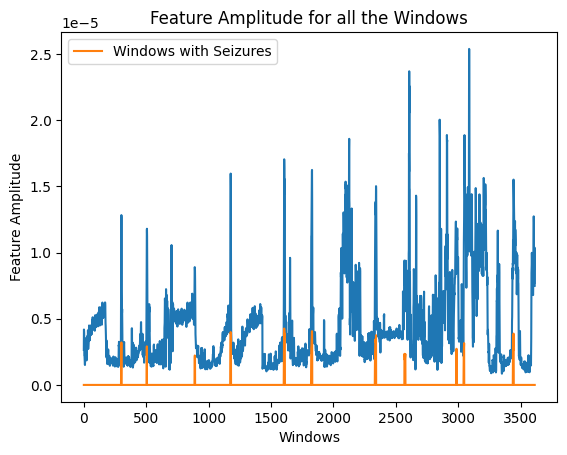

In [15]:
labels = []
channel = 0 # 2
time_axis = np.arange(0, len(loaded_data)) 
arr = []
dt = 0
for i in range(len(loaded_data)):
    # dt = np.var((loaded_data[i][0][channel])) # variance
    # dt = np.std((loaded_data[i][0][channel])) # std deviation
    # dt = np.average(abs((loaded_data[i][0][channel]))) # mean/average (abs(loaded_data[i][0][channel]).sum())
    # dt = np.median((abs((loaded_data[i][0][channel])))) # median
    y1 = loaded_data[i][0][channel]
    yf1 = fft(y1)
    xf1 = fftfreq(N, T)[:N//2]
    dt = np.mean((2.0/N * np.abs(yf1[0:N//2]))[(np.where(xf1 == 0))[0][0]:((np.where(xf1 == 4))[0][0])])
    # dt = (abs(loaded_data[i][0][channel]).sum())
    arr.append(dt)
    # labels.append((loaded_data[i][1])*np.max(dt)*0.25)
    labels.append((loaded_data[i][1])*np.max(dt)*0.25)
plt.plot(time_axis, arr)
plt.plot(time_axis, (labels), label= "Windows with Seizures")
plt.legend()
plt.title('Feature Amplitude for all the Windows')
plt.xlabel('Windows')
plt.ylabel('Feature Amplitude')
plt.show()

In [8]:
N = len(loaded_data[0][0][0])
T = 1.0 / 256
x = np.linspace(0.0, N*T, N, endpoint=False)  
new_data = []
for window in loaded_data:
    data, label = window
    window_features = []
    for channel in data:
        features = []
        y1 = channel
        yf1 = fft(y1)
        xf1 = fftfreq(N, T)[:N//2]
        features.append((abs(channel).sum()))
        features.append(np.var(channel))
        features.append(np.median((abs((channel)))))
        features.append(np.mean((2.0/N * np.abs(yf1[0:N//2]))[(np.where(xf1 == 0))[0][0]:((np.where(xf1 == 4))[0][0])]))
        features.append(np.mean((2.0/N * np.abs(yf1[0:N//2]))[(np.where(xf1 == 4))[0][0]:((np.where(xf1 == 8))[0][0])]))
        features.append(np.mean((2.0/N * np.abs(yf1[0:N//2]))[(np.where(xf1 == 8))[0][0]:((np.where(xf1 == 12))[0][0])]))
        features.append(np.mean((2.0/N * np.abs(yf1[0:N//2]))[(np.where(xf1 == 12))[0][0]:((np.where(xf1 == 30))[0][0])]))
        features.append(np.mean((2.0/N * np.abs(yf1[0:N//2]))[(np.where(xf1 == 30))[0][0]:((np.where(xf1 == 55))[0][0])]))
        features.append(np.mean((2.0/N * np.abs(yf1[0:N//2]))[(np.where(xf1 == 55))[0][0]:((np.where(xf1 == 61))[0][0])]))
        window_features.append(features)
    new_data.append((np.array(window_features), label))

In [9]:
with gzip.open('MyDataFeature.pkl', 'wb') as f:
    pickle.dump(new_data, f)

In [14]:
print(len(new_data[0][0][0]))
print(len(loaded_data[0][0][0]))

9
7680


In [ ]:
counter = 0 
for i in range(len(new_data)):
    if new_data[i][1] == True:
        counter += 1
        print(new_data[i])
print(counter)

In [108]:
from scipy.signal import resample
downsample_hz = 100
num_samples_downsampled = int((downsample_hz / 256) * len(loaded_data[0][0][0])) 
downsampled_data = []
for window in loaded_data:
    data, label = window
    window_features = []
    downsampled_window = []
    for channel in data:
        # rnd = np.random.randint(100, size=(1000))
        # # rnd = np.arange(0,3000) 
        # downsampled_window.append(rnd)
        downsampled_window.append(resample(channel,num_samples_downsampled)) 
    downsampled_data.append((np.array(downsampled_window),label))  # 

print(len(downsampled_data))

# time1 = np.arange(0, len(loaded_data[0][0][0])) /256
# time2 = np.arange(0,len(downsampled_window))/100
# plt.plot(time1, loaded_data[297][0][0])
# plt.show()
# plt.plot(time2, downsampled_window)
# plt.show()


3615


In [ ]:
with gzip.open('MyDataDownsampled.pkl', 'wb') as f:
    pickle.dump(loaded_data, f)

In [107]:
import sys
print(len(downsampled_data[0][0][0]))
print("te")
print(len(loaded_data))
sys.getsizeof(downsampled_data)

1000
te
3615


29336

In [ ]:
for i in range(len(loaded_data)):
    if loaded_data[i][1] == True:
        plt.plot((np.arange(0,len(loaded_data[0][0][0]))/256),loaded_data[i][0][0])
        print(i)
        plt.ylim(top = 0.0004)
        plt.ylim(bottom = -0.0004)
        plt.title('Window Containing a Seizure')
        plt.xlabel('Time (s)')
        plt.ylabel('Signal Amplitude (μV)')
        plt.show()
        plt.plot((np.arange(0,len(loaded_data[0][0][0]))/256),loaded_data[i-2][0][0])
        print(i-2)
        plt.ylim(top = 0.0004)
        plt.ylim(bottom = -0.0004)
        plt.title('Window that Shows Normal Brain Acitivty')
        plt.xlabel('Time (s)')
        plt.ylabel('Signal Amplitude (μV)')
        plt.show()